In [234]:
import numpy as np
import pandas as pd      #http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [157]:
# train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
# test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

train_set = pd.read_csv('train.csv', header = 0,index_col=None)
test_set = pd.read_csv('test.csv' ,  header = 0,index_col=None)

# train_set.drop(columns=['Unnamed: 0'],inplace=True)
# test_set.drop(columns=['Unnamed: 0'],inplace=True)
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [109]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [76]:
# col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',\
# 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',\
# 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
# train_set.columns = col_labels
# test_set.columns = col_labels

In [73]:
# test_set.to_csv('test.csv', index=False)

In [74]:
# train_set.to_csv('train.csv', index=False)

In [78]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


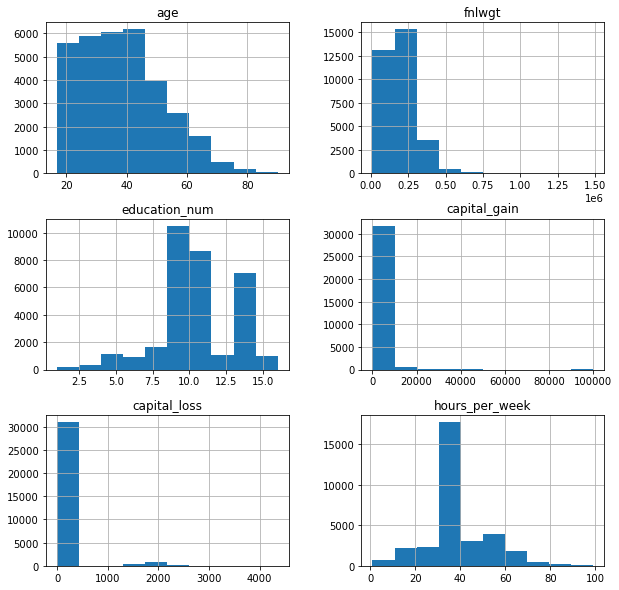

In [39]:
train_set.hist(figsize=(10,10))
plt.show()

In [46]:
np.unique(train_set['education_num'])


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [29]:
train_set.isin([' ?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

In [33]:
for feature in train_set.columns:
    if train_set[feature].dtype == 'object':
        
        print('_'*10,feature, end=" ",)
        print('_'*10)
        print(train_set[feature].value_counts())

__________ workclass __________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
__________ education __________
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
__________ marital_status __________
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name

In [158]:
# setting categories for age column

train_set = train_set.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
test_set = test_set.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
data =[ train_set,test_set]
for dataset in data:
#     dataset = dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[ dataset['age'] <= 11, 'age'] = 0
    dataset.loc[(dataset['age'] > 11) & (dataset['age'] <= 18), 'age'] = 1
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 22), 'age'] = 2
    dataset.loc[(dataset['age'] > 22) & (dataset['age'] <= 27), 'age'] = 3
    dataset.loc[(dataset['age'] > 27) & (dataset['age'] <= 33), 'age'] = 4
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 40), 'age'] = 5
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 66), 'age'] = 6
    dataset.loc[ dataset['age'] > 66, 'age'] = 6
    
    dataset.drop([ 'fnlwgt', 'capital_gain','capital_loss', 'native_country'], axis=1, inplace=True)
    
    dataset['wage_class'] = dataset['wage_class'].map({'<=50K': 0, '>50K': 1,'<=50K.': 0, '>50K.': 1}).astype(int)
#     print(dataset.head())
    

# train_set = data[0]
# test_set = data[1]

In [159]:
train_set.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,wage_class
0,5,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,0
1,6,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
2,5,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
3,6,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
4,4,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0


In [160]:
test_set.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,wage_class
0,3,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,0
1,5,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,0
2,4,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,1
3,6,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,1
4,1,?,Some-college,10,Never-married,?,Own-child,White,Female,30,0


In [161]:
for col in test_set.columns:
    print(col,end='+')

age+workclass+education+education_num+marital_status+occupation+relationship+race+sex+hours_per_week+wage_class+

In [172]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
s='race[T.<Black]'
print(regex.sub( '_', s))

race_T._Black_


In [174]:
ytrain, Xtrain = dmatrices('wage_class ~ 0+C(age)+workclass+education+education_num+marital_status+occupation+relationship+race+sex+hours_per_week',
                  train_set, return_type="dataframe")
Xtrain.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in Xtrain.columns.values]
ytrain.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in ytrain.columns.values]
print( Xtrain.columns)
print( ytrain.columns)

Index(['C(age)_1_', 'C(age)_2_', 'C(age)_3_', 'C(age)_4_', 'C(age)_5_',
       'C(age)_6_', 'workclass_T.Federal-gov_', 'workclass_T.Local-gov_',
       'workclass_T.Never-worked_', 'workclass_T.Private_',
       'workclass_T.Self-emp-inc_', 'workclass_T.Self-emp-not-inc_',
       'workclass_T.State-gov_', 'workclass_T.Without-pay_',
       'education_T.11th_', 'education_T.12th_', 'education_T.1st-4th_',
       'education_T.5th-6th_', 'education_T.7th-8th_', 'education_T.9th_',
       'education_T.Assoc-acdm_', 'education_T.Assoc-voc_',
       'education_T.Bachelors_', 'education_T.Doctorate_',
       'education_T.HS-grad_', 'education_T.Masters_',
       'education_T.Preschool_', 'education_T.Prof-school_',
       'education_T.Some-college_', 'marital_status_T.Married-AF-spouse_',
       'marital_status_T.Married-civ-spouse_',
       'marital_status_T.Married-spouse-absent_',
       'marital_status_T.Never-married_', 'marital_status_T.Separated_',
       'marital_status_T.Widowed_', 

In [164]:
ytrain[:6]

,wage_class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0


In [175]:
ytest, Xtest = dmatrices('wage_class ~ 0+C(age)+workclass+education+education_num+marital_status+occupation+relationship+race+sex+hours_per_week',
                  test_set, return_type="dataframe")
Xtest.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in Xtest.columns.values]
ytest.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in ytest.columns.values]
print( Xtest.columns)
print( ytest.columns)

Index(['C(age)_1_', 'C(age)_2_', 'C(age)_3_', 'C(age)_4_', 'C(age)_5_',
       'C(age)_6_', 'workclass_T.Federal-gov_', 'workclass_T.Local-gov_',
       'workclass_T.Never-worked_', 'workclass_T.Private_',
       'workclass_T.Self-emp-inc_', 'workclass_T.Self-emp-not-inc_',
       'workclass_T.State-gov_', 'workclass_T.Without-pay_',
       'education_T.11th_', 'education_T.12th_', 'education_T.1st-4th_',
       'education_T.5th-6th_', 'education_T.7th-8th_', 'education_T.9th_',
       'education_T.Assoc-acdm_', 'education_T.Assoc-voc_',
       'education_T.Bachelors_', 'education_T.Doctorate_',
       'education_T.HS-grad_', 'education_T.Masters_',
       'education_T.Preschool_', 'education_T.Prof-school_',
       'education_T.Some-college_', 'marital_status_T.Married-AF-spouse_',
       'marital_status_T.Married-civ-spouse_',
       'marital_status_T.Married-spouse-absent_',
       'marital_status_T.Never-married_', 'marital_status_T.Separated_',
       'marital_status_T.Widowed_', 

In [180]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': .5,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 100
}
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(**params).fit(Xtrain,ytrain)
y_pred= xgb.predict(Xtest)
accuracy_score(ytest, y_pred)

C:\Users\kurud\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kurud\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[13:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8404274921687857

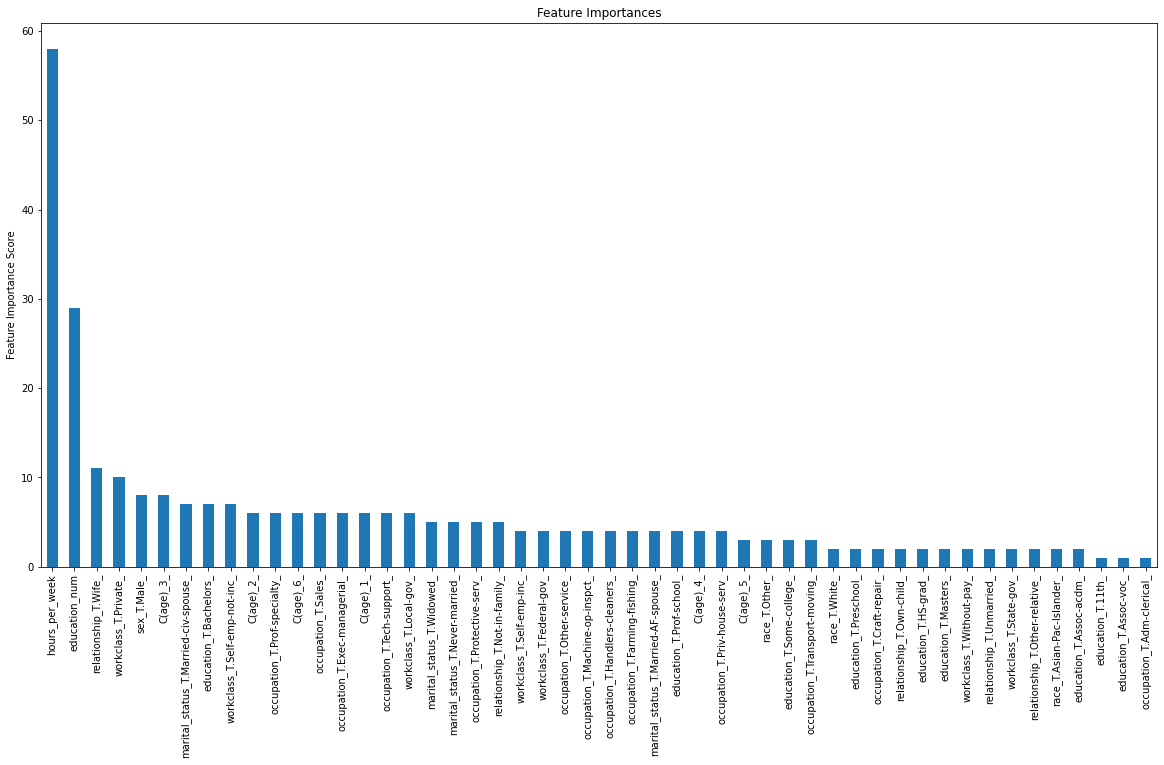

In [179]:
features_contribution = pd.Series(xgb.get_booster().get_fscore()).sort_values(ascending=False)
plt.figure(figsize=(20,10))
features_contribution[:50].plot(kind='bar', title='Feature Importances')
#features_contribution[:50].plot(kind='line')
plt.ylabel('Feature Importance Score')
plt.show()

In [191]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200],
    'verbosity':[0]
}

In [192]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [193]:
grid.fit(Xtrain,ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.3s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.3s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.3s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.3s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.3s
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   1.3s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   1.2s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   1.2s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   1.2s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   1.3s
[CV 1/5]

[CV 3/5] END  learning_rate=0.5, max_depth=3, n_estimators=50, verbosity=0; total time=   1.3s
[CV 4/5] END  learning_rate=0.5, max_depth=3, n_estimators=50, verbosity=0; total time=   1.4s
[CV 5/5] END  learning_rate=0.5, max_depth=3, n_estimators=50, verbosity=0; total time=   1.2s
[CV 1/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   2.5s
[CV 2/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   2.4s
[CV 3/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   2.4s
[CV 4/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   2.4s
[CV 5/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   2.3s
[CV 1/5] END  learning_rate=0.5, max_depth=3, n_estimators=200, verbosity=0; total time=   4.7s
[CV 2/5] END  learning_rate=0.5, max_depth=3, n_estimators=200, verbosity=0; total time=   4.9s
[CV 3/5] END  learning_rate=0.5, max_depth=

[CV 4/5] END  learning_rate=0.1, max_depth=3, n_estimators=100, verbosity=0; total time=   2.8s
[CV 5/5] END  learning_rate=0.1, max_depth=3, n_estimators=100, verbosity=0; total time=   2.8s
[CV 1/5] END  learning_rate=0.1, max_depth=3, n_estimators=200, verbosity=0; total time=   5.5s
[CV 2/5] END  learning_rate=0.1, max_depth=3, n_estimators=200, verbosity=0; total time=   5.2s
[CV 3/5] END  learning_rate=0.1, max_depth=3, n_estimators=200, verbosity=0; total time=   5.7s
[CV 4/5] END  learning_rate=0.1, max_depth=3, n_estimators=200, verbosity=0; total time=   5.0s
[CV 5/5] END  learning_rate=0.1, max_depth=3, n_estimators=200, verbosity=0; total time=   5.6s
[CV 1/5] END  learning_rate=0.1, max_depth=5, n_estimators=10, verbosity=0; total time=   0.5s
[CV 2/5] END  learning_rate=0.1, max_depth=5, n_estimators=10, verbosity=0; total time=   0.4s
[CV 3/5] END  learning_rate=0.1, max_depth=5, n_estimators=10, verbosity=0; total time=   0.4s
[CV 4/5] END  learning_rate=0.1, max_depth=

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [197]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 200, 'verbosity': 0}

In [196]:
grid.best_score_

0.8421731900025314

In [226]:
new_model=XGBClassifier(learning_rate= 1, max_depth= 3, n_estimators= 200)
new_model.fit(Xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [227]:
y_pred_new = new_model.predict(Xtest)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(ytest,predictions_new)
accuracy_new

0.8343467845955408

In [229]:
import pickle
filename = 'xgboost_model.pickle'
pickle.dump(new_model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

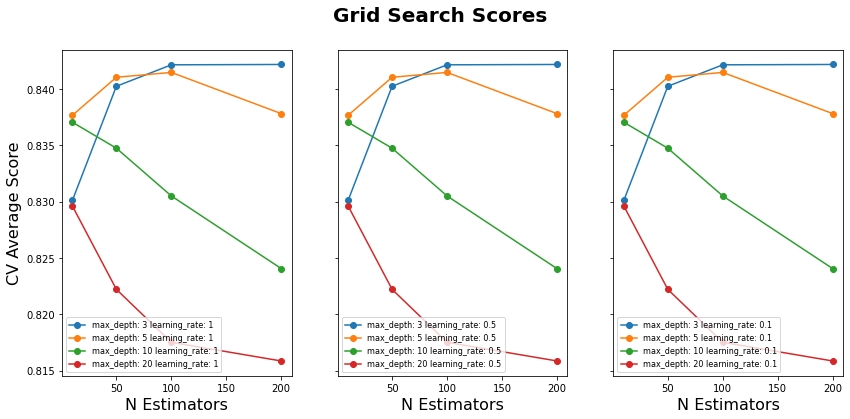

In [253]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, g3, name_param_1, name_param_2,n3):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(g3),len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1),len(g3))

    # Plot Grid search scores
#     plt.figure(figsize=(14, 6))
    fig, ax = plt.subplots(1,3,figsize=(14, 6),sharey=True)
    
    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(g3):
#         plt.figure(figsize=(10, 8))
        for idx2, val2 in enumerate(grid_param_2):
            ax[idx].plot(grid_param_1, scores_mean[idx,idx2,:], '-o', label= name_param_2 + ': ' + str(val2)+" "+ n3 + ': ' + str(val))
        ax[idx].set_xlabel(name_param_1, fontsize=16)
        ax[idx].legend(loc="best", fontsize=8)
#         ax[idx].grid('on')
    ax[0].set_ylabel('CV Average Score', fontsize=16)
    fig.suptitle("Grid Search Scores", fontsize=20, fontweight='bold')
    plt.show()

# Calling Method 
n_estimators=[10,50,100,200]
max_depth= [3,5,10,20]
learning_rate =[1,0.5,0.1]

plot_grid_search(grid.cv_results_, n_estimators,  max_depth, learning_rate, 'N Estimators', 'max_depth', 'learning_rate')

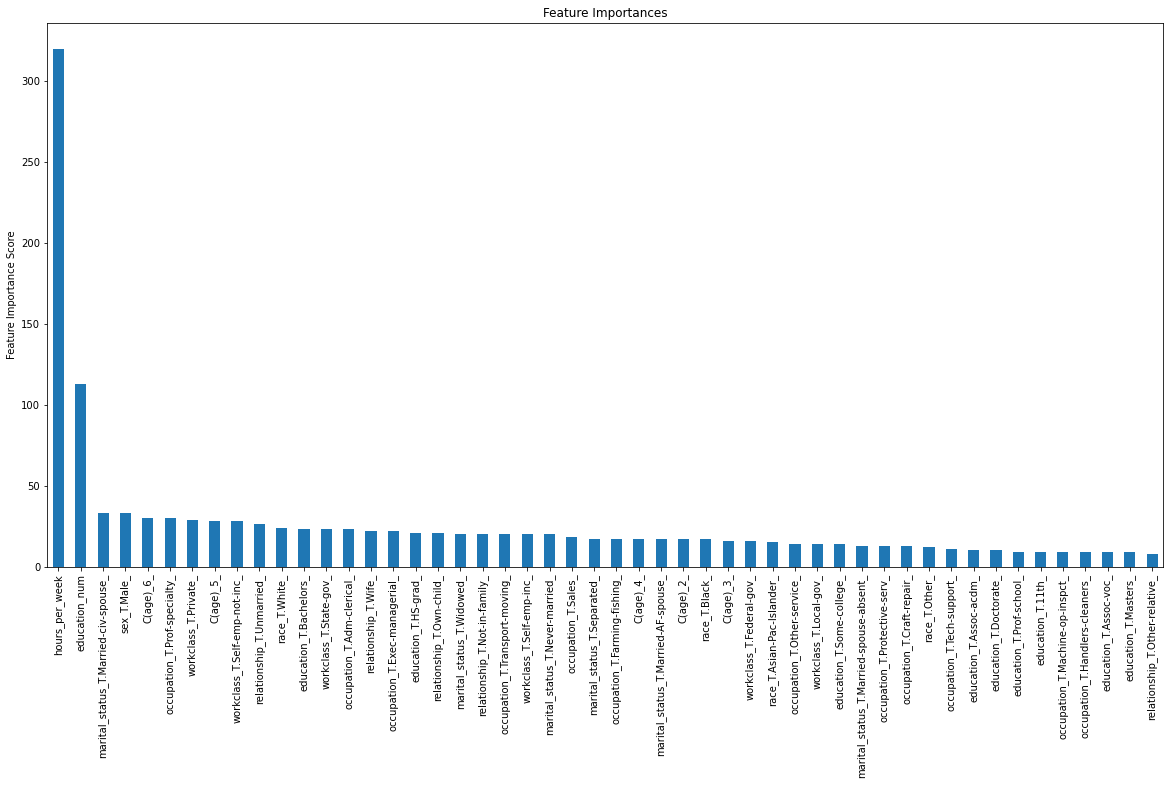

In [231]:
features_contribution = pd.Series(new_model.get_booster().get_fscore()).sort_values(ascending=False)
plt.figure(figsize=(20,10))
features_contribution[:50].plot(kind='bar', title='Feature Importances')
#features_contribution[:50].plot(kind='line')
plt.ylabel('Feature Importance Score')
plt.show()

In [236]:
##without dummies for categorical values
train_set = pd.read_csv('train.csv', header = 0,index_col=None)
test_set = pd.read_csv('test.csv' ,  header = 0,index_col=None)
data =[ train_set,test_set]
for dataset in data:
    for column in dataset:
        enc=LabelEncoder()
        if dataset.dtypes[column]==np.object:
             dataset[column]=enc.fit_transform(dataset[column])    
    dataset.drop([ 'fnlwgt', 'capital_gain','capital_loss', 'native_country'], axis=1, inplace=True)  
    dataset['age']=pd.qcut(dataset['age'], 6, labels=False)
#     dataset['wage_class'] = dataset['wage_class'].map({'<=50K': 0, '>50K': 1,'<=50K.': 0, '>50K.': 1}).astype(int)
#     print(dataset.head())


In [237]:
train_set.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,wage_class
0,3,7,9,13,4,1,1,4,1,40,0
1,4,6,9,13,2,4,0,4,1,13,0
2,3,4,11,9,0,6,1,4,1,40,0
3,5,4,1,7,2,6,0,2,1,40,0
4,1,4,9,13,2,10,5,2,0,40,0


In [238]:
test_set.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,wage_class
0,1,4,1,7,4,7,3,2,1,40,0
1,3,4,11,9,2,5,0,4,1,50,0
2,1,2,7,12,2,11,0,4,1,40,1
3,3,4,15,10,2,7,0,2,1,40,1
4,0,0,15,10,4,0,3,4,0,30,0


In [260]:
Xtrain = train_set.drop(columns = ['wage_class'])
ytrain = train_set['wage_class']
Xtest = test_set.drop(columns = ['wage_class'])
ytest = test_set['wage_class']

In [262]:
Xtest

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week
0,1,4,1,7,4,7,3,2,1,40
1,3,4,11,9,2,5,0,4,1,50
2,1,2,7,12,2,11,0,4,1,40
3,3,4,15,10,2,7,0,2,1,40
4,0,0,15,10,4,0,3,4,0,30
...,...,...,...,...,...,...,...,...,...,...
16276,3,4,9,13,0,10,1,4,0,36
16277,5,0,11,9,6,0,2,2,1,40
16278,3,4,9,13,2,10,0,4,1,50
16279,3,4,9,13,0,1,3,1,1,40


In [272]:
new_model=XGBClassifier(objective='binary:logistic',learning_rate= 1, max_depth= 3, n_estimators= 100)
new_model.fit(Xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [273]:
y_pred_new = new_model.predict(Xtest)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(ytest,predictions_new)
accuracy_new

0.8342239420183035

In [268]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200],
    'verbosity':[0]
}
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)
grid.fit(Xtrain,ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   0.4s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   0.4s
[CV 1/5]

[CV 3/5] END  learning_rate=0.5, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 4/5] END  learning_rate=0.5, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 5/5] END  learning_rate=0.5, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 1/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   0.7s
[CV 2/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   0.7s
[CV 3/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   0.8s
[CV 4/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   0.7s
[CV 5/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   0.7s
[CV 1/5] END  learning_rate=0.5, max_depth=3, n_estimators=200, verbosity=0; total time=   1.3s
[CV 2/5] END  learning_rate=0.5, max_depth=3, n_estimators=200, verbosity=0; total time=   1.4s
[CV 3/5] END  learning_rate=0.5, max_depth=

[CV 4/5] END  learning_rate=0.1, max_depth=3, n_estimators=100, verbosity=0; total time=   0.7s
[CV 5/5] END  learning_rate=0.1, max_depth=3, n_estimators=100, verbosity=0; total time=   0.7s
[CV 1/5] END  learning_rate=0.1, max_depth=3, n_estimators=200, verbosity=0; total time=   1.4s
[CV 2/5] END  learning_rate=0.1, max_depth=3, n_estimators=200, verbosity=0; total time=   1.5s
[CV 3/5] END  learning_rate=0.1, max_depth=3, n_estimators=200, verbosity=0; total time=   1.4s
[CV 4/5] END  learning_rate=0.1, max_depth=3, n_estimators=200, verbosity=0; total time=   1.5s
[CV 5/5] END  learning_rate=0.1, max_depth=3, n_estimators=200, verbosity=0; total time=   1.6s
[CV 1/5] END  learning_rate=0.1, max_depth=5, n_estimators=10, verbosity=0; total time=   0.1s
[CV 2/5] END  learning_rate=0.1, max_depth=5, n_estimators=10, verbosity=0; total time=   0.1s
[CV 3/5] END  learning_rate=0.1, max_depth=5, n_estimators=10, verbosity=0; total time=   0.1s
[CV 4/5] END  learning_rate=0.1, max_depth=

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

best param=  {' learning_rate': 1, 'max_depth': 3, 'n_estimators': 100, 'verbosity': 0}
best score=  0.8422653653192574


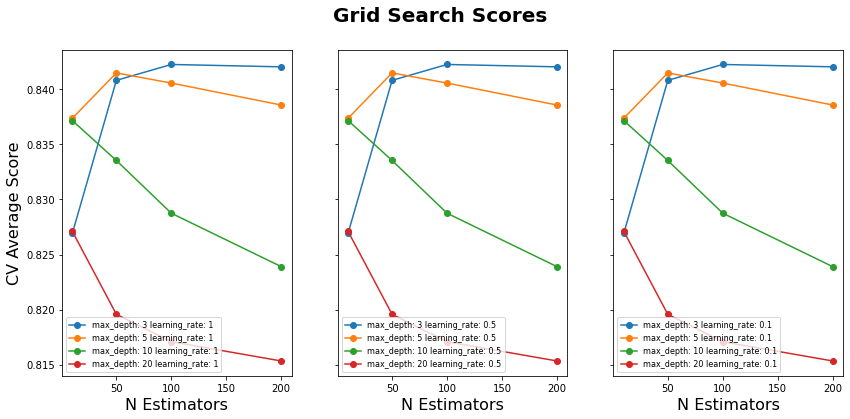

In [271]:
print('best param= ',grid.best_params_)
print('best score= ',grid.best_score_)
plot_grid_search(grid.cv_results_, n_estimators,  max_depth, learning_rate, 'N Estimators', 'max_depth', 'learning_rate')

In [274]:
##without dummies for categorical values
train_set = pd.read_csv('train.csv', header = 0,index_col=None)
test_set = pd.read_csv('test.csv' ,  header = 0,index_col=None)
data =[ train_set,test_set]
for dataset in data:
    for column in dataset:
        enc=LabelEncoder()
        if dataset.dtypes[column]==np.object:
             dataset[column]=enc.fit_transform(dataset[column])    
    dataset.drop([ 'fnlwgt', 'capital_gain','capital_loss', 'native_country'], axis=1, inplace=True)  


In [275]:
train_set.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,wage_class
0,39,7,9,13,4,1,1,4,1,40,0
1,50,6,9,13,2,4,0,4,1,13,0
2,38,4,11,9,0,6,1,4,1,40,0
3,53,4,1,7,2,6,0,2,1,40,0
4,28,4,9,13,2,10,5,2,0,40,0


In [277]:
Xtrain = train_set.drop(columns = ['wage_class'])
ytrain = train_set['wage_class']
Xtest = test_set.drop(columns = ['wage_class'])
ytest = test_set['wage_class']

In [278]:
param_grid={
   
    ' learning_rate':[1,0.5],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200],
    'verbosity':[0]
}
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)
grid.fit(Xtrain,ytrain)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.1s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   0.4s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 1/5]

[CV 3/5] END  learning_rate=0.5, max_depth=3, n_estimators=50, verbosity=0; total time=   0.4s
[CV 4/5] END  learning_rate=0.5, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 5/5] END  learning_rate=0.5, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 1/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   0.7s
[CV 2/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   0.7s
[CV 3/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   0.7s
[CV 4/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   0.7s
[CV 5/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   0.6s
[CV 1/5] END  learning_rate=0.5, max_depth=3, n_estimators=200, verbosity=0; total time=   1.8s
[CV 2/5] END  learning_rate=0.5, max_depth=3, n_estimators=200, verbosity=0; total time=   1.6s
[CV 3/5] END  learning_rate=0.5, max_depth=

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [280]:
y_pred_new = grid.predict(Xtest)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(ytest,predictions_new)
accuracy_new

0.8387691173760825

best param=  {' learning_rate': 1, 'max_depth': 5, 'n_estimators': 50, 'verbosity': 0}
best score=  0.8430331267157614


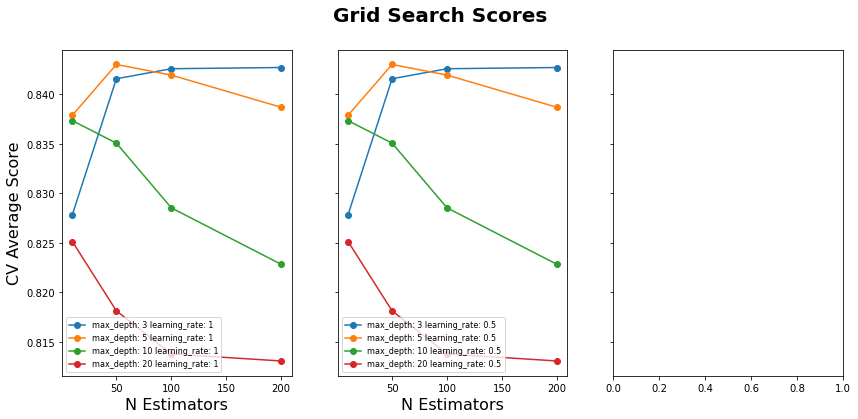

In [282]:
print('best param= ',grid.best_params_)
print('best score= ',grid.best_score_)
learning_rate =[1,0.5]
plot_grid_search(grid.cv_results_, n_estimators,  max_depth, learning_rate, 'N Estimators', 'max_depth', 'learning_rate')